In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import contextlib
import warnings
warnings.filterwarnings("ignore")

# Encoding WELL_BORE_CODE (this will become our clusters)

In [49]:
data = pd.read_csv('all_wells.csv')

def count_zeroes(data_df, column_name):
  # number of 0s
  zero_count = (data_df[column_name] == 0).sum()
  print(f"Number of 0s in {column_name}: {zero_count}")

# Dropping Date column for now
data.drop(columns=['DATEPRD'], inplace=True)
data.info()

def Removing_Outliers(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  data_no_outliers = data[(data[column] >= lower_bound) &
                                  (data[column] <= upper_bound)]

  # Verify the result
  print(f"Original data size: {len(data)}")
  print(f"Data size after removing outliers: {len(data)}")
  return data_no_outliers

# Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['WELL_BORE_CODE'] = le.fit_transform(data[['WELL_BORE_CODE']])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7361 entries, 0 to 7360
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL_BORE_CODE            7361 non-null   object 
 1   AVG_DOWNHOLE_PRESSURE     7361 non-null   float64
 2   AVG_DOWNHOLE_TEMPERATURE  7361 non-null   float64
 3   AVG_DP_TUBING             7361 non-null   float64
 4   AVG_ANNULUS_PRESS         6932 non-null   float64
 5   AVG_CHOKE_SIZE_P          7361 non-null   float64
 6   AVG_WHP_P                 7361 non-null   float64
 7   AVG_WHT_P                 7361 non-null   float64
 8   DP_CHOKE_SIZE             7361 non-null   float64
 9   BORE_OIL_VOL              7361 non-null   float64
 10  BORE_GAS_VOL              7361 non-null   float64
 11  BORE_WAT_VOL              7361 non-null   float64
dtypes: float64(11), object(1)
memory usage: 690.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7361 entries, 0 to

In [71]:
# Retrieve the original labels
print("\nOriginal Labels:")
for index, label in enumerate(le.classes_):
    print(f"Encoded {index} -> Original Label: {label}")


Original Labels:
Encoded 0 -> Original Label: NO 15/9-F-1 C
Encoded 1 -> Original Label: NO 15/9-F-11 H
Encoded 2 -> Original Label: NO 15/9-F-12 H
Encoded 3 -> Original Label: NO 15/9-F-14 H
Encoded 4 -> Original Label: NO 15/9-F-15 D


# Before dropping zeroes, I need to check which features has a high correlation to other features

In [50]:
# Check 0s
for cols in data.columns:
  if cols != 'WELL_BORE_CODE':
    count_zeroes(data, cols)

Number of 0s in AVG_DOWNHOLE_PRESSURE: 1911
Number of 0s in AVG_DOWNHOLE_TEMPERATURE: 1911
Number of 0s in AVG_DP_TUBING: 2
Number of 0s in AVG_ANNULUS_PRESS: 860
Number of 0s in AVG_CHOKE_SIZE_P: 0
Number of 0s in AVG_WHP_P: 4
Number of 0s in AVG_WHT_P: 2
Number of 0s in DP_CHOKE_SIZE: 2
Number of 0s in BORE_OIL_VOL: 3
Number of 0s in BORE_GAS_VOL: 0
Number of 0s in BORE_WAT_VOL: 371


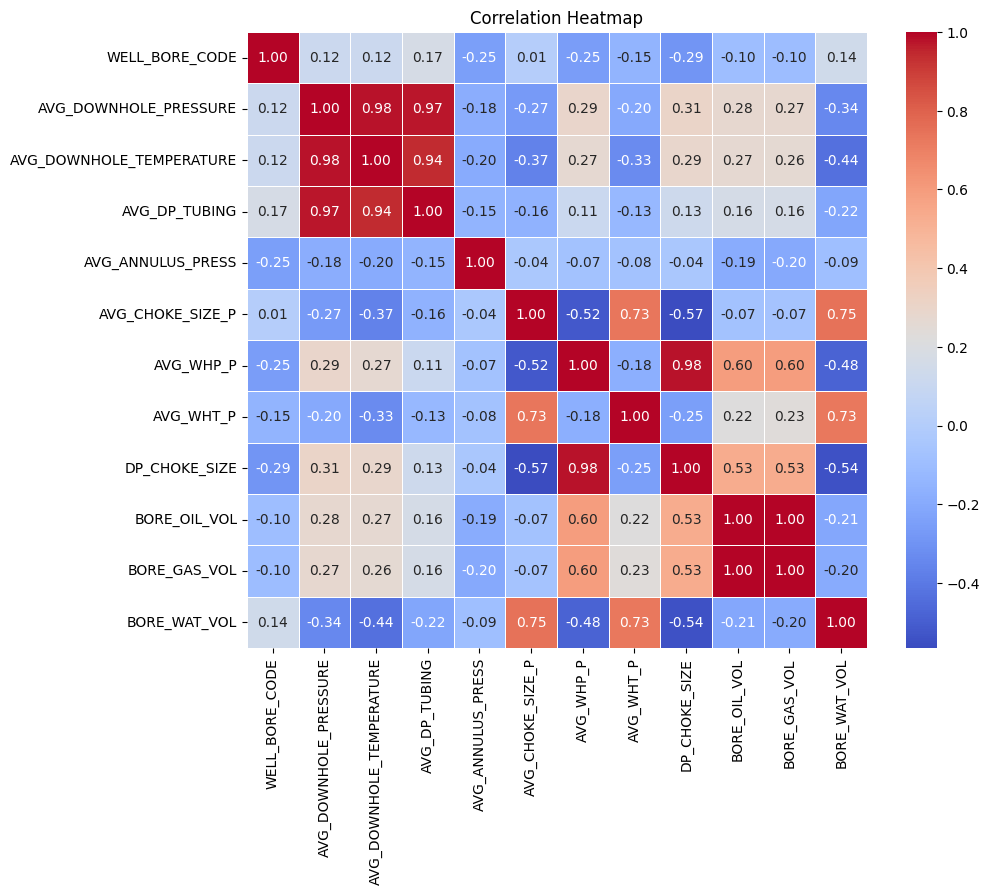

In [51]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

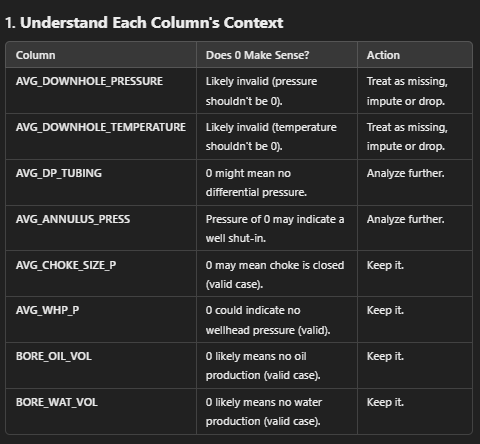

# Dropping highly correlated

In [52]:
# Dropping
data.drop(columns=["BORE_GAS_VOL",
                   "BORE_WAT_VOL",
                   "AVG_DOWNHOLE_TEMPERATURE",
                   "AVG_DP_TUBING",
                   "AVG_WHP_P",
                   "BORE_GAS_VOL",
                   "AVG_ANNULUS_PRESS",
                   ], inplace=True)

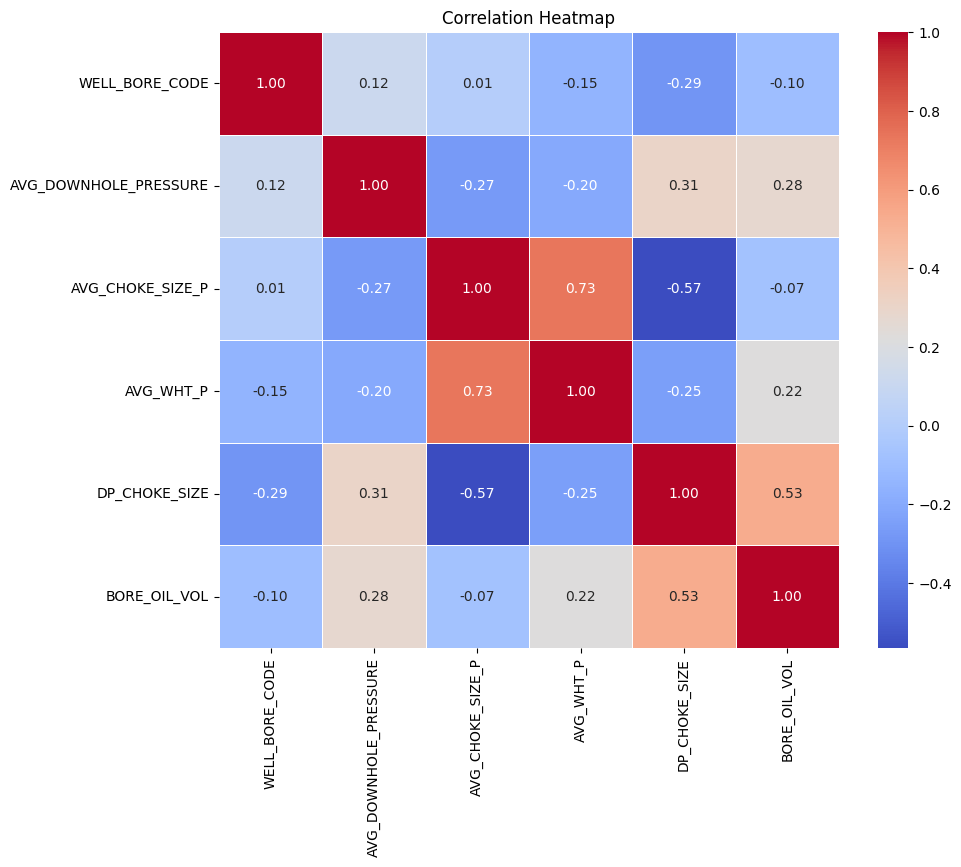

In [53]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Visually checking for 0's and outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7361 entries, 0 to 7360
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WELL_BORE_CODE         7361 non-null   int64  
 1   AVG_DOWNHOLE_PRESSURE  7361 non-null   float64
 2   AVG_CHOKE_SIZE_P       7361 non-null   float64
 3   AVG_WHT_P              7361 non-null   float64
 4   DP_CHOKE_SIZE          7361 non-null   float64
 5   BORE_OIL_VOL           7361 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 345.2 KB
             Column Name  Number of 0s
0  AVG_DOWNHOLE_PRESSURE          1911
1       AVG_CHOKE_SIZE_P             0
2              AVG_WHT_P             2
3          DP_CHOKE_SIZE             2
4           BORE_OIL_VOL             3


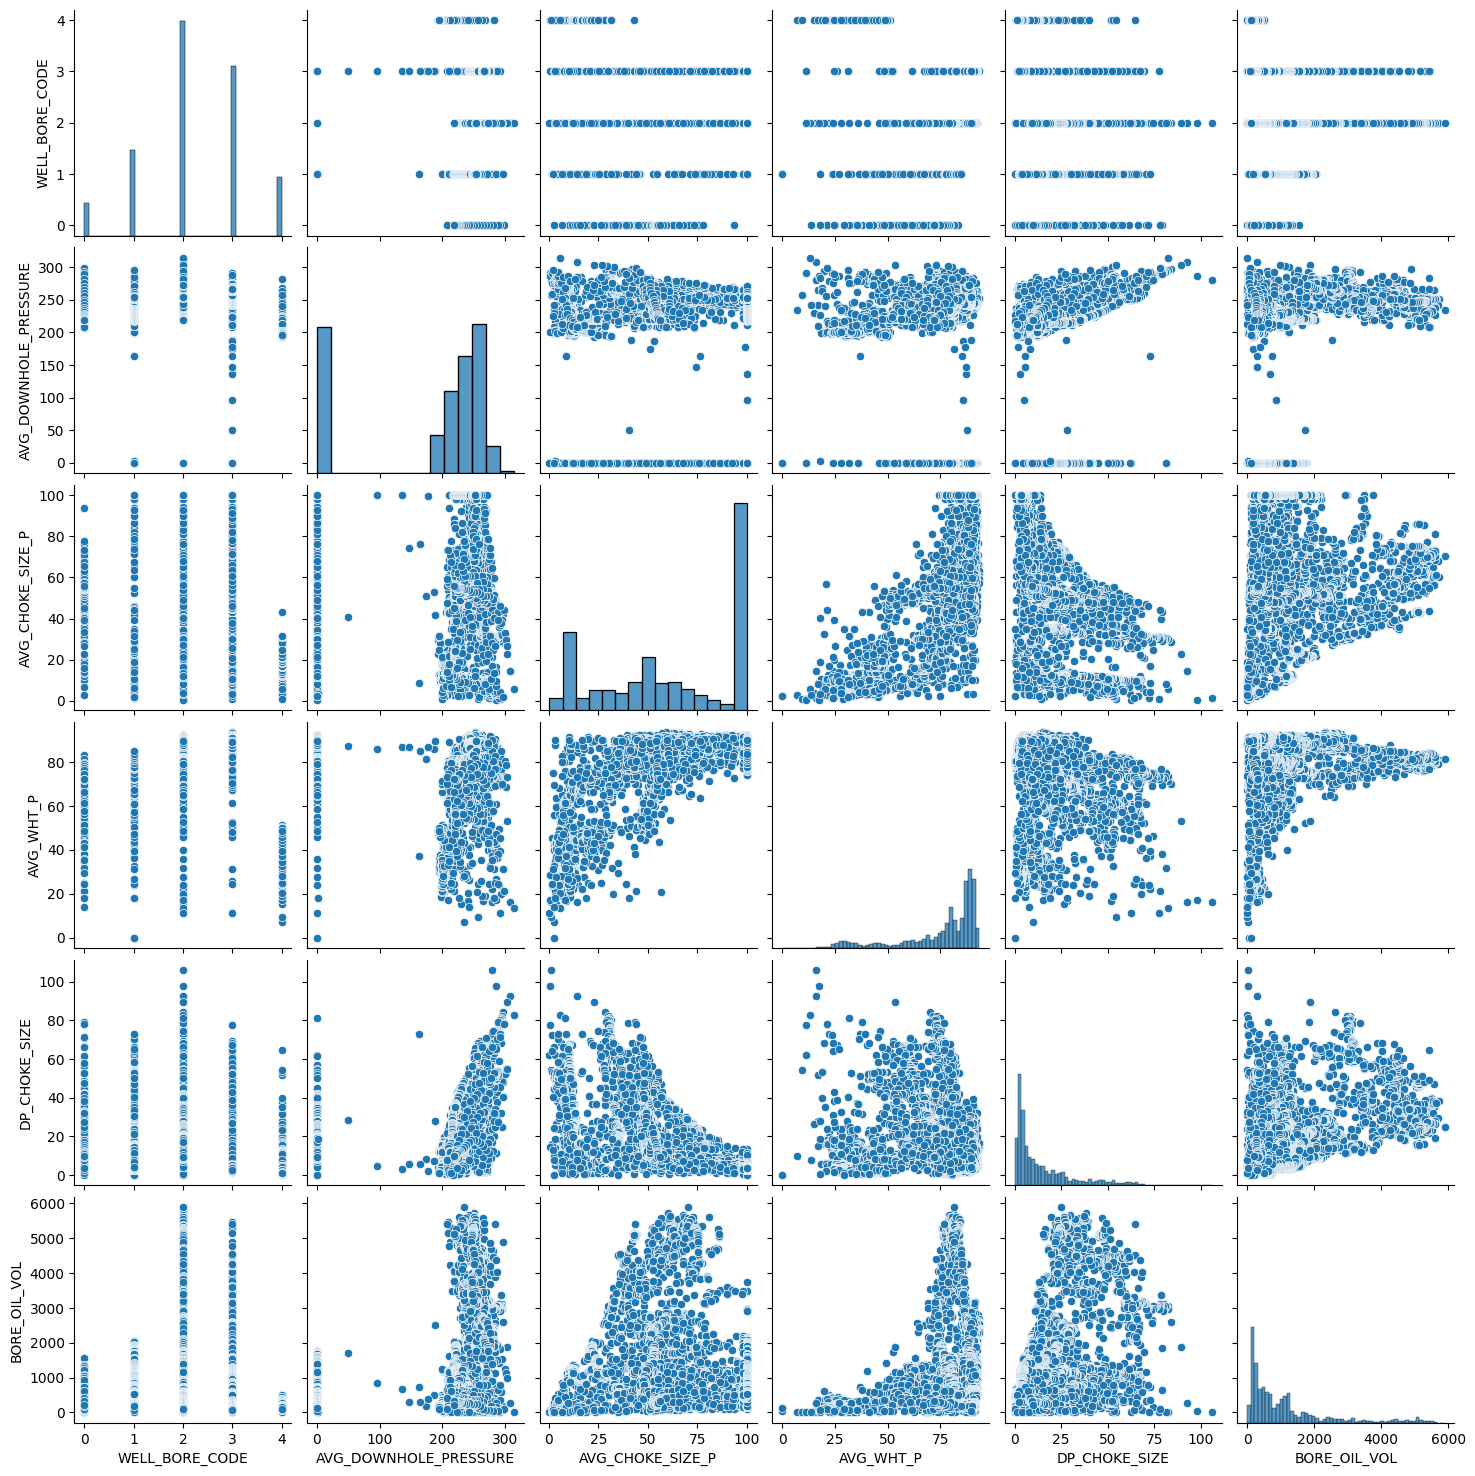

In [54]:
data.info()
# Print Number of0's
zero_counts = {col: len(data[data[col] == 0]) for col in data.columns if col != 'WELL_BORE_CODE'}
zero_counts_df = pd.DataFrame(zero_counts.items(), columns=['Column Name', 'Number of 0s'])
print(zero_counts_df)
sns.pairplot(data)
plt.show()

# Data cleanup and EDA (Exploratory Data Analysis)

In [55]:
# Excluding 0s
data_cleaned = data[data['AVG_DOWNHOLE_PRESSURE'] != 0].copy()

Original data size: 5450
Data size after removing outliers: 5450
Original data size: 5445
Data size after removing outliers: 5445
Original data size: 5445
Data size after removing outliers: 5445
Original data size: 5159
Data size after removing outliers: 5159
Original data size: 4955
Data size after removing outliers: 4955


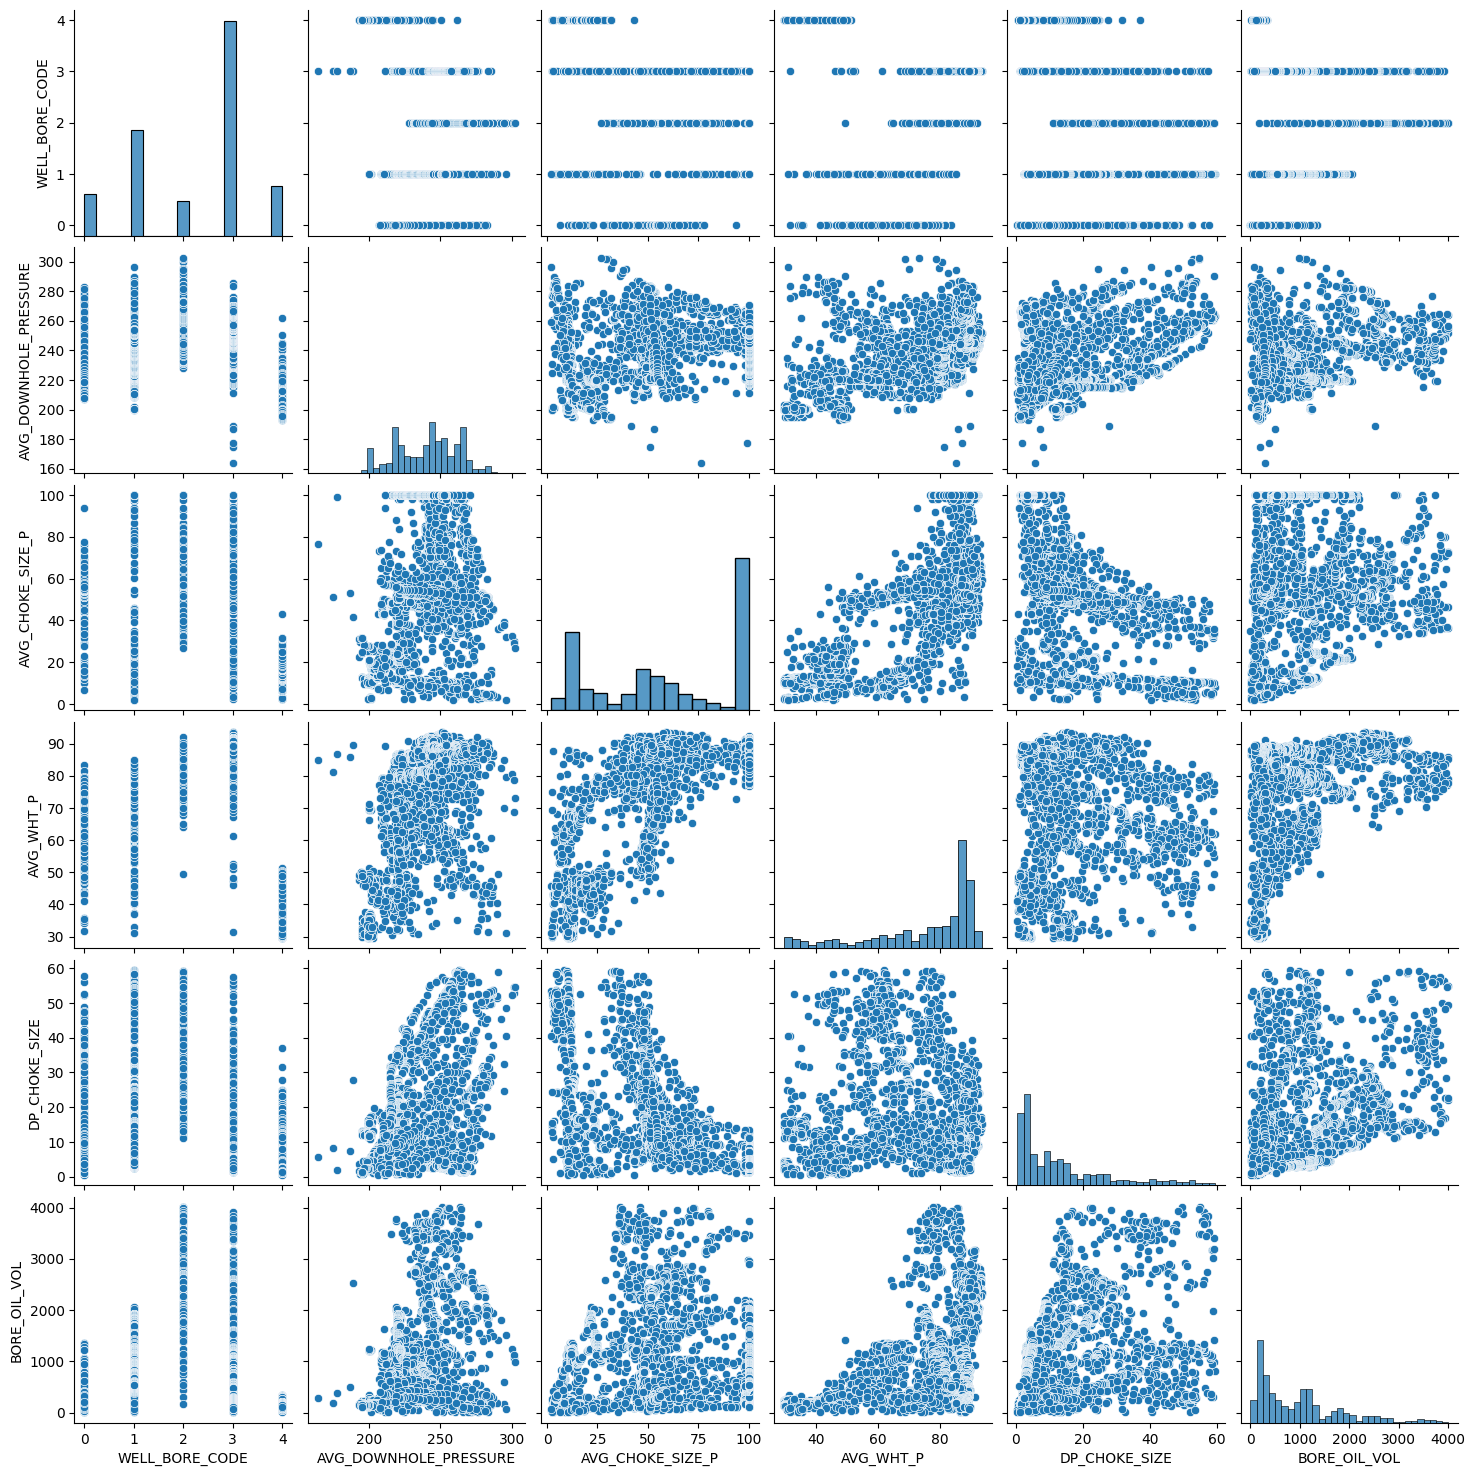

In [56]:
# Cleaning outliers
columns_to_clean = [col for col in data_cleaned.columns if col != 'WELL_BORE_CODE']
for col in columns_to_clean:
  data_cleaned = Removing_Outliers(data_cleaned, col)

sns.pairplot(data_cleaned)
plt.show()

# Checking if data is cleaned and ready for model prediction

In [65]:
# Check 0s
for cols in data_cleaned.columns:
  if cols != 'WELL_BORE_CODE':
    count_zeroes(data_cleaned, cols)
data_cleaned.info()

Number of 0s in AVG_DOWNHOLE_PRESSURE: 0
Number of 0s in AVG_CHOKE_SIZE_P: 0
Number of 0s in AVG_WHT_P: 0
Number of 0s in DP_CHOKE_SIZE: 0
Number of 0s in BORE_OIL_VOL: 0
<class 'pandas.core.frame.DataFrame'>
Index: 4513 entries, 27 to 7360
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WELL_BORE_CODE         4513 non-null   int64  
 1   AVG_DOWNHOLE_PRESSURE  4513 non-null   float64
 2   AVG_CHOKE_SIZE_P       4513 non-null   float64
 3   AVG_WHT_P              4513 non-null   float64
 4   DP_CHOKE_SIZE          4513 non-null   float64
 5   BORE_OIL_VOL           4513 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 246.8 KB


# Visualizing data from each clusters, as you can see cluster 2 data is highly dispersed - meaning it will be hard for the models to find patterns

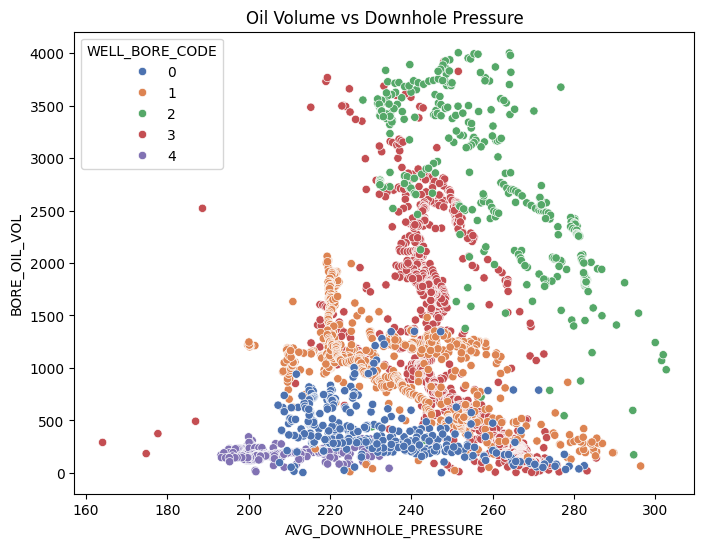

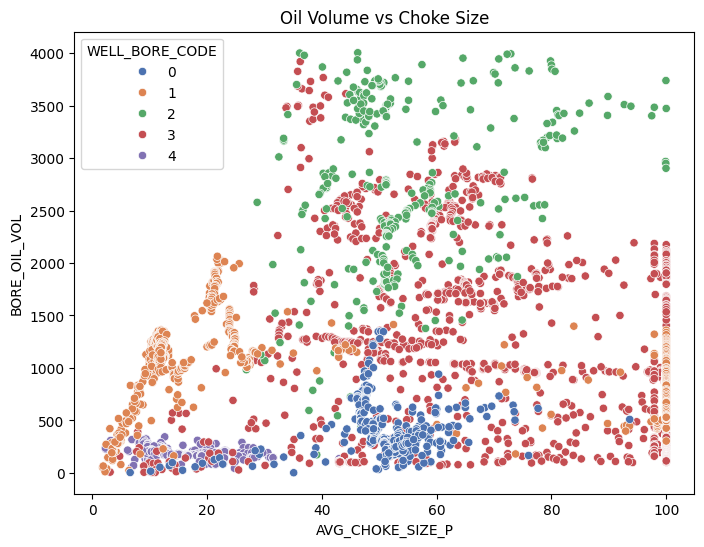

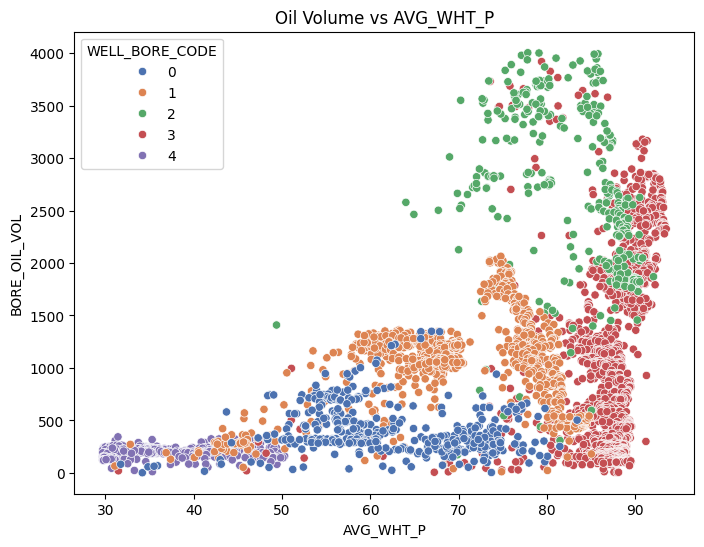

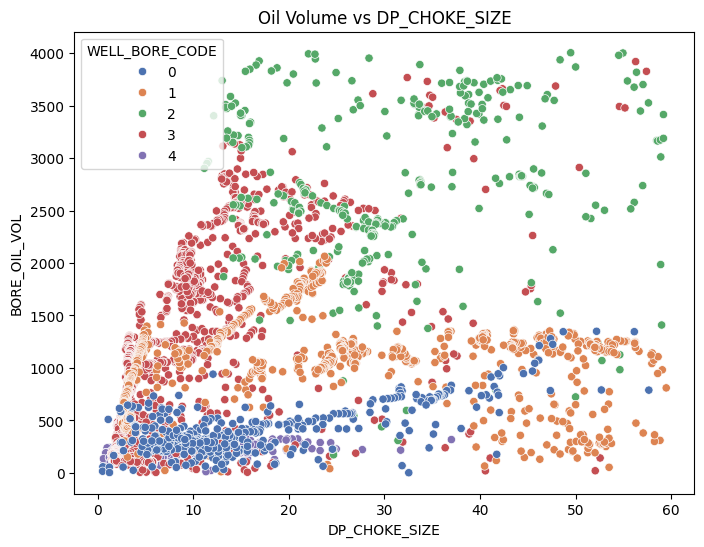

WELL_BORE_CODE
0     416
1    1072
2     348
3    2175
4     502
dtype: int64


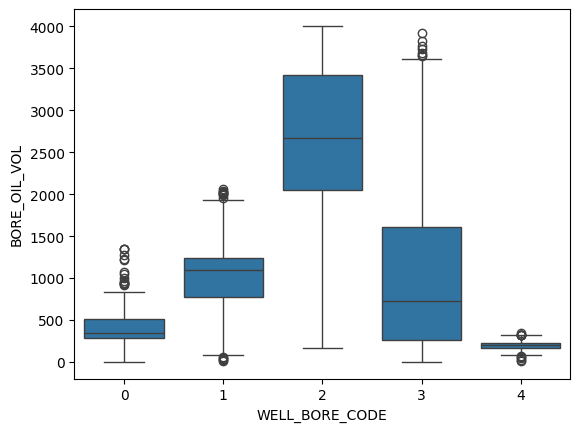

In [58]:
# Visuals
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Pressure vs Oil Volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AVG_DOWNHOLE_PRESSURE', y='BORE_OIL_VOL', hue='WELL_BORE_CODE', data=data_cleaned, palette='deep')
plt.title('Oil Volume vs Downhole Pressure')
plt.xlabel('AVG_DOWNHOLE_PRESSURE')
plt.ylabel('BORE_OIL_VOL')
plt.show()

# Scatter plot: Choke Size vs Oil Volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AVG_CHOKE_SIZE_P', y='BORE_OIL_VOL', hue='WELL_BORE_CODE', data=data_cleaned, palette='deep')
plt.title('Oil Volume vs Choke Size')
plt.xlabel('AVG_CHOKE_SIZE_P')
plt.ylabel('BORE_OIL_VOL')
plt.show()

# Scatter plot: AVG_WHT_P vs Oil Volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AVG_WHT_P', y='BORE_OIL_VOL', hue='WELL_BORE_CODE', data=data_cleaned, palette='deep')
plt.title('Oil Volume vs AVG_WHT_P')
plt.xlabel('AVG_WHT_P')
plt.ylabel('BORE_OIL_VOL')
plt.show()

# Scatter plot: DP_CHOKE_SIZE vs Oil Volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DP_CHOKE_SIZE', y='BORE_OIL_VOL', hue='WELL_BORE_CODE', data=data_cleaned, palette='deep')
plt.title('Oil Volume vs DP_CHOKE_SIZE')
plt.xlabel('DP_CHOKE_SIZE')
plt.ylabel('BORE_OIL_VOL')
plt.show()

cluster_count = data_cleaned.groupby('WELL_BORE_CODE').size()
print(cluster_count)
sns.boxplot(x=data_cleaned['WELL_BORE_CODE'],y=data_cleaned['BORE_OIL_VOL'])
plt.show()


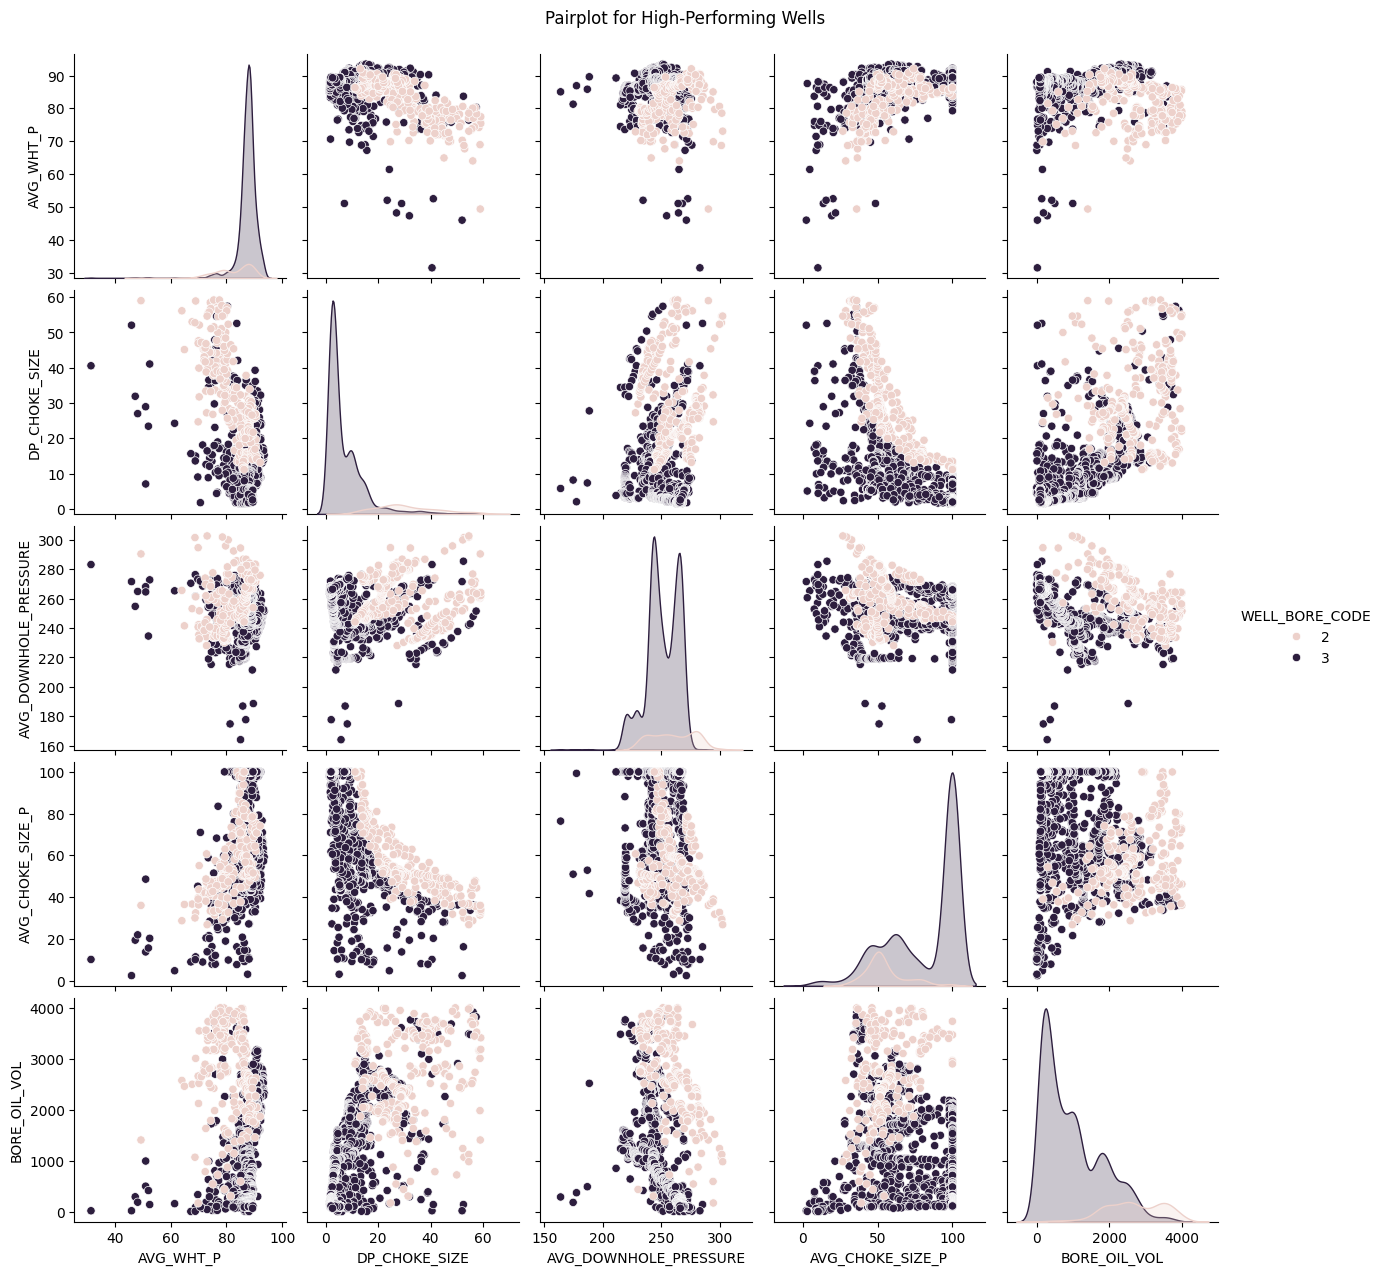

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for high-performing wells (2 and 3)
high_perf_wells = data_cleaned[data_cleaned['WELL_BORE_CODE'].isin([2, 3])]
# Pairplot for selected features and oil volume
sns.pairplot(high_perf_wells, vars=['AVG_WHT_P', 'DP_CHOKE_SIZE', 'AVG_DOWNHOLE_PRESSURE', 'AVG_CHOKE_SIZE_P', 'BORE_OIL_VOL'], hue='WELL_BORE_CODE')
plt.suptitle('Pairplot for High-Performing Wells', y=1.02)
plt.show()


# Plugging in data to different models
# Different models will be applied to each cluster of data and the best model will be selected

In [60]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# Features and target variable
features = ['AVG_DOWNHOLE_PRESSURE', 'AVG_CHOKE_SIZE_P', 'DP_CHOKE_SIZE', 'AVG_WHT_P']
target = 'BORE_OIL_VOL'

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1),
    'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Store results
results = []

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each cluster
for cluster in data_cleaned['WELL_BORE_CODE'].unique():
    print(f"\nTraining Models for Cluster: {cluster}")
    # Filter data for the cluster
    cluster_data = data_cleaned[data_cleaned['WELL_BORE_CODE'] == cluster]
    X = cluster_data[features]
    y = cluster_data[target]

    # Train and evaluate each model using KFold
    for model_name, model in models.items():
        r2_scores = []
        mae_scores = []
        rmse_scores = []

        for train_idx, test_idx in kf.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Train the model
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Calculate metrics
            r2_scores.append(r2_score(y_test, y_pred))
            mae_scores.append(mean_absolute_error(y_test, y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

        # Store averaged results across folds
        results.append({
            'Cluster': cluster,
            'Model': model_name,
            'R-squared': np.mean(r2_scores),
            'MAE': np.mean(mae_scores),
            'RMSE': np.mean(rmse_scores)
        })
        print(f"{model_name} - R²: {np.mean(r2_scores):.4f}, MAE: {np.mean(mae_scores):.2f}, RMSE: {np.mean(rmse_scores):.2f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display all results
print("\nModel Performance by Cluster:")
print(results_df)

# Find the best-performing model for each cluster
best_models = results_df.loc[results_df.groupby('Cluster')['R-squared'].idxmax()]
print("\nBest Performing Model for Each Cluster:")
print(best_models)



Training Models for Cluster: 4
Random Forest - R²: 0.6383, MAE: 15.29, RMSE: 27.82
Gradient Boosting - R²: 0.6020, MAE: 17.66, RMSE: 29.29
XGBoost - R²: 0.6115, MAE: 16.04, RMSE: 28.72
LightGBM - R²: 0.6254, MAE: 17.37, RMSE: 28.30
SVR - R²: 0.0101, MAE: 35.29, RMSE: 46.56

Training Models for Cluster: 3
Random Forest - R²: 0.9548, MAE: 64.19, RMSE: 169.77
Gradient Boosting - R²: 0.9501, MAE: 92.19, RMSE: 179.47
XGBoost - R²: 0.9570, MAE: 70.47, RMSE: 166.69
LightGBM - R²: 0.9556, MAE: 74.22, RMSE: 169.23
SVR - R²: -0.0425, MAE: 642.33, RMSE: 833.59

Training Models for Cluster: 2
Random Forest - R²: 0.6269, MAE: 256.19, RMSE: 469.60
Gradient Boosting - R²: 0.5879, MAE: 275.91, RMSE: 495.83
XGBoost - R²: 0.6281, MAE: 258.37, RMSE: 468.39
LightGBM - R²: 0.6333, MAE: 270.05, RMSE: 463.12
SVR - R²: -0.0366, MAE: 659.50, RMSE: 791.36

Training Models for Cluster: 1
Random Forest - R²: 0.9611, MAE: 37.78, RMSE: 77.43
Gradient Boosting - R²: 0.9610, MAE: 46.54, RMSE: 78.72
XGBoost - R²: 0.9

# It seems that cluster 2 and 4 needs further enhancement

In [61]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import pandas as pd
import numpy as np

# Features and target
features = ['AVG_DOWNHOLE_PRESSURE', 'AVG_CHOKE_SIZE_P', 'DP_CHOKE_SIZE', 'AVG_WHT_P']
target = 'BORE_OIL_VOL'

# K-Fold Cross Validation setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Results storage
results = []

# Hyperparameter Tuning for LightGBM (Cluster 2)
print("\n--- Hyperparameter Tuning for Cluster 2 (LightGBM) ---")
cluster_2_data = data_cleaned[data_cleaned['WELL_BORE_CODE'] == 2]
X2 = cluster_2_data[features]
y2 = cluster_2_data[target]

param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_data_in_leaf': [10, 20, 30]
}

lgbm = LGBMRegressor(random_state=42, verbose=-1)
grid_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=kfold, scoring='r2', verbose=1)
grid_lgbm.fit(X2, y2)

# Best Model for Cluster 2
best_lgbm = grid_lgbm.best_estimator_
y2_pred = best_lgbm.predict(X2)

print("Best Hyperparameters for LightGBM (Cluster 2):", grid_lgbm.best_params_)
print(f"R-squared: {r2_score(y2, y2_pred):.4f}")
print(f"MAE: {mean_absolute_error(y2, y2_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y2, y2_pred)):.2f}")

# Hyperparameter Tuning for XGBoost (Cluster 4)
print("\n--- Hyperparameter Tuning for Cluster 4 (XGBoost) ---")
cluster_4_data = data_cleaned[data_cleaned['WELL_BORE_CODE'] == 4]
X4 = cluster_4_data[features]
y4 = cluster_4_data[target]

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=kfold, scoring='r2', verbose=1)
grid_xgb.fit(X4, y4)

# Best Model for Cluster 4
best_xgb = grid_xgb.best_estimator_
y4_pred = best_xgb.predict(X4)

print("Best Hyperparameters for XGBoost (Cluster 4):", grid_xgb.best_params_)
print(f"R-squared: {r2_score(y4, y4_pred):.4f}")
print(f"MAE: {mean_absolute_error(y4, y4_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y4, y4_pred)):.2f}")



--- Hyperparameter Tuning for Cluster 2 (LightGBM) ---
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters for LightGBM (Cluster 2): {'learning_rate': 0.1, 'max_depth': 5, 'min_data_in_leaf': 20, 'n_estimators': 100}
R-squared: 0.9059
MAE: 144.13
RMSE: 242.27

--- Hyperparameter Tuning for Cluster 4 (XGBoost) ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters for XGBoost (Cluster 4): {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
R-squared: 0.9997
MAE: 0.59
RMSE: 0.80


# Trying to stack models:
The stacking technique is an advanced ensemble learning approach that combines multiple models to improve overall predictive performance. 🚀

Stacking leverages the strengths of various base models by training a meta-model (final estimator) that uses predictions from the base models as inputs. It is commonly used in both regression and classification tasks.

In [62]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.linear_model import Ridge
# Define estimators for stacking
estimators = [
    ('lgbm', LGBMRegressor(**grid_lgbm.best_params_)),
    ('xgb', XGBRegressor(**grid_xgb.best_params_))
]

# Initialize the StackingRegressor
stacked_model = StackingRegressor(estimators=estimators)

# Fit the StackingRegressor
stacked_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacked_model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the metrics
print("Metrics for Stacked Model:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")


Metrics for Stacked Model:
R-squared: 0.8396
Mean Absolute Error (MAE): 63.17
Root Mean Square Error (RMSE): 84.49
